### All packages needed for this project are here:

In [1]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression

# Show the plots inline in the notebook
%matplotlib inline

## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*

In [2]:

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
# Defining student_id ass the seed for sampling to ensure getting the random sample
my_id = 2310107
#Sampling the data
sample_cardio_data = cardio_data.sample(n=1500, random_state=my_id)
# print first 15 rows of sampled data
sample_cardio_data.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
560,55,1,163,80.0,110,80,0,0,0,0,1,0,0,1,0,0
3584,62,1,156,94.0,120,80,0,0,1,0,1,0,0,1,0,0
3380,54,1,158,100.0,130,90,0,0,1,0,0,0,1,0,0,1
1535,51,2,169,59.0,110,70,0,0,1,0,0,1,0,1,0,0
5646,63,1,154,72.0,180,100,0,0,1,1,0,0,1,0,0,1
328,46,1,168,70.0,120,80,0,0,0,0,1,0,0,1,0,0
2269,45,1,160,60.0,120,80,0,0,1,0,1,0,0,1,0,0
2130,57,1,165,65.0,120,80,0,0,0,0,1,0,0,1,0,0
1720,41,1,162,51.0,120,80,1,1,1,0,1,0,0,1,0,0
4462,40,1,157,110.0,140,80,0,0,1,1,1,0,0,1,0,0


In [4]:
from sklearn.calibration import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

encoder = LabelEncoder()
cardio_data['gender'] = encoder.fit_transform(cardio_data['gender'])
cardio_data.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
0,48,1,170,104.0,120,80,0,0,1,0,1,0,0,1,0,0
1,51,0,160,59.0,110,80,0,0,1,0,0,1,0,1,0,0
2,42,1,166,77.0,120,80,0,0,1,0,1,0,0,1,0,0
3,55,0,168,80.0,120,80,0,0,1,0,1,0,0,1,0,0
4,57,0,154,41.0,806,0,0,0,1,0,1,0,0,1,0,0
5,53,0,152,56.0,103,65,0,0,1,0,1,0,0,1,0,0
6,42,0,167,67.0,110,70,0,0,1,0,1,0,0,1,0,0
7,41,1,172,70.0,110,80,0,0,1,0,1,0,0,1,0,0
8,43,1,169,67.0,100,80,0,0,1,0,1,0,0,1,0,0
9,39,1,168,60.0,120,80,0,0,1,0,1,0,0,0,1,0


----

We have the data so now, let's put it to use. 
To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

In [5]:
### Code - Train-test split
from sklearn.model_selection import train_test_split
features = cardio_data[['age',
             'gender',
             'height',
             'weight',
             'ap_hi',
             'ap_lo',
             'smoke',
             'alco',
             'active',
             'cholesterol_normal',
             'cholesterol_elevated',
             'cholesterol_high',
             'gluc_normal',
             'gluc_elevated',
             'gluc_high']]
labels = cardio_data['cardio']

# random_state is used to ensure random split is reproducible 80% trainin set and 20% test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2,random_state=42, stratify = labels)

#Checking the balance of target variable
print(cardio_data['cardio'].value_counts())

cardio
0    4200
1    1800
Name: count, dtype: int64


In [6]:
#checking features trained data heads
print(features_train.head())


      age  gender  height  weight  ap_hi  ap_lo  smoke  alco  active  \
297    52       1     170    75.0    120     80      0     0       1   
572    51       0     169    82.0    120     80      0     0       1   
2295   45       1     167    69.0    110     70      0     0       0   
5457   44       0     155    59.0    120     80      0     0       1   
4493   53       1     171    74.0    120     80      0     0       1   

      cholesterol_normal  cholesterol_elevated  cholesterol_high  gluc_normal  \
297                    1                     0                 0            1   
572                    1                     0                 0            1   
2295                   1                     0                 0            1   
5457                   1                     0                 0            1   
4493                   1                     0                 0            1   

      gluc_elevated  gluc_high  
297               0          0  
572           

In [7]:
#checking features train data heads
print(features_train.head())
#checking labes train data heads
print(labels_train.head())

      age  gender  height  weight  ap_hi  ap_lo  smoke  alco  active  \
297    52       1     170    75.0    120     80      0     0       1   
572    51       0     169    82.0    120     80      0     0       1   
2295   45       1     167    69.0    110     70      0     0       0   
5457   44       0     155    59.0    120     80      0     0       1   
4493   53       1     171    74.0    120     80      0     0       1   

      cholesterol_normal  cholesterol_elevated  cholesterol_high  gluc_normal  \
297                    1                     0                 0            1   
572                    1                     0                 0            1   
2295                   1                     0                 0            1   
5457                   1                     0                 0            1   
4493                   1                     0                 0            1   

      gluc_elevated  gluc_high  
297               0          0  
572           

In [12]:
print("For Train and Test cardio Mean")
print(labels_train.mean(), labels_test.mean())

For Train and Test cardio Mean
0.3 0.3


Checking Stratification Here

In [10]:
# Checking In the original data
print("In the sampled cardio Data:")
print(sample_cardio_data['cardio'].value_counts(normalize=True))

# Checking In the original data
print("In the Origional cardio Data:")
print(cardio_data['cardio'].value_counts(normalize=True))

# In the training set
print("\n In Training Set:")
print(labels_train.value_counts(normalize=True))

# In the test set
print("\n In Test Set:")
print(labels_test.value_counts(normalize=True))

In the sampled cardio Data:
cardio
0    0.706667
1    0.293333
Name: proportion, dtype: float64
In the Origional cardio Data:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64

 In Training Set:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64

 In Test Set:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64


<font color = lightcoral> The value counts data shows about 70% samples belongs to class 0 and 30% beongs to class 1 so the data is slightly imbalanced but the class distribution shows consistent pattern in all data sample.The stratification in train_test_split did work correctly.So we don't need here.

----------
**Exercise 1 C)** 

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [13]:
# Define numerical and binary features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary_features    = ['gender', 'smoke', 'alco', 'active', 'cholesterol_normal', 
                      'cholesterol_elevated', 'cholesterol_high', 'gluc_normal', 
                      'gluc_elevated', 'gluc_high']

# Function to fit the scaler
def fit_scaler(features_train, numerical_features):
    scaler = StandardScaler().fit(features_train[numerical_features])
    return scaler

# Function to scale the features of numerical data
def scale_features(features, numerical_features, scaler):
    features_scale = features.copy(deep=True)
    features_scale[numerical_features] = scaler.transform(features[numerical_features])
    return features_scale

# Fit the scaler using the training data
scaler = fit_scaler(features_train, numerical_features)

# Scale the training and test data
features_train_scale = scale_features(features_train, numerical_features, scaler)
features_test_scale = scale_features(features_test, numerical_features, scaler)

#Checking the features scale trained data
features_train_scale.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
297,-0.013537,1,0.661544,0.125244,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0
572,-0.159885,0,0.541007,0.623197,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0
2295,-1.037969,1,0.299935,-0.301573,-0.083750,-0.127345,0,0,0,1,0,0,1,0,0
5457,-1.184317,0,-1.146502,-1.012935,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0
4493,0.132810,1,0.782080,0.054108,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0


<font color = lightcoral> The k-NN model is distance based algorithm. The model assigns the new instance based on labels of nearest neighbours.For non standardized features the larger scale will dominate the distance calculation and effect the accuraty of prediction.Comparing the centimeters and kilometers the feature in kms will have smaller range of values and will have less impact on distance. So standardization before applying k-NN model is important because the standardized data make k-NN model more accurate predictions.</font>

------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

Confusion Matrix:
 [[705 135]
 [187 173]]


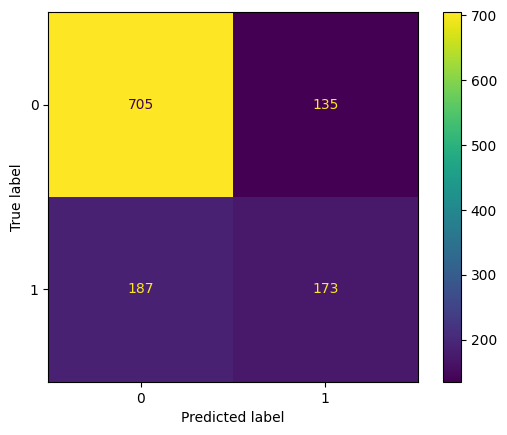

Accuracy: 0.73
Precision: 0.72
Recall: 0.73


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(features_train, labels_train)

# Make predictions on the test set
y_predict = knn_model.predict(features_test)

#calculating the predicted probabilities of the positive class 
y_predict_probas = knn_model.predict_proba(features_test)[:,1]

# Confusion matrix
conf_matrix = confusion_matrix(labels_test, y_predict, labels=knn_model.classes_)
print(f"Confusion Matrix:\n {conf_matrix}")

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
cm_display.plot()
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(labels_test, y_predict)
precision = precision_score(labels_test, y_predict, average='weighted')
recall = recall_score(labels_test, y_predict, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


<font color = lightcoral> 
1)Bottom right 173 is true positive.Top left 705 means True (negative)0 class. Top right 135 represents false positives class.Bottom left 187 is false negatives.


2)Model perform well with class 0 lack with class 1.The accuracy of the model is 0.73. This means that 73% of the total predictions made by the model are correct.The precision is 0.72 suggests 72% of the positive predictions made by the model are actually positive. The recall 0.73 means that the model correctly identified 74% of the actual positives.
 
 
3)In our data imbalance of class can create in misleading of accuracy.It is also affected by evaluation metrics  
</font>


You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

In [ ]:

random_seeds = np.random.randint(1, 10000, size=1000)

# Storing the accuracies from each split
accuracies = []

# Perform 1000 train-test splits using different seeds
for seed in random_seeds:
    # Splitting the data
    (random_features_train, random_features_test, random_labels_train, random_labels_test )= train_test_split(features_train, labels_train, test_size=0.2, random_state=seed)
    
    # Initialization of the k-NN model
    knn = KNeighborsClassifier(n_neighbors=3)

    # Train the model
    knn.fit(random_features_train, random_labels_train)

    # Making the predictions
    y_pred = knn.predict(random_features_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(random_labels_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies in a histogram
plt.hist(accuracies, bins=20, color='blue')
plt.axvline(np.mean(accuracies), color='black', label='Mean Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of k-NN Model Accuracies')
plt.legend()
plt.show()

# Printing the mean accuracy
print("Mean Accuracy:", np.mean(accuracies))